In [70]:
# Use this cell to regroup all your imports

## Classic Import
import pandas as pd
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from scipy import stats
from time import time

# Widgets import
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.datasets import make_blobs


# SKlearn model Import
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor

#Trees and boosting import 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Unsupervised cluster model
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


#Curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Scaler import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import get_scorer_names

#Pipeline import
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
import pickle

#Encoding import
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

#Permutation import
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#subtests import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import max_error

##Times Series import
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
#import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima

#Deeplearning import
import tensorflow.keras
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import optimizers


#from sklearn import set_config; set_config(display='diagram')


# MNIST Classification

🎯 <b><u>Exercise objectives</u></b>
- Understand the *MNIST* dataset 
- Design your first **Convolutional Neural Network** (*CNN*) and answer questions such as:
    - what are *Convolutional Layers*? 
    - how many *parameters* are involved in such a layer?
- Train this CNN on images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


🚀 <b><u>Let's get started!</u></b>

Imagine that we are  back in time into the 90's.
You work at a *Post Office* and you have to deal with an enormous amount of letters on a daily basis. How could you automate the process of reading the ZIP Codes, which are a combination of 5 handwritten digits? 

This task, called the **Handwriting Recognition**, used to be a very complex problem back in those days. It was solved by *Bell Labs* (among others) where one of the Deep Learning gurus, [*Yann Le Cun*](https://en.wikipedia.org/wiki/Yann_LeCun), used to work.

From [Wikipedia](https://en.wikipedia.org/wiki/Handwriting_recognition):

> Handwriting recognition (HWR), also known as Handwritten Text Recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices

![Number recognition](/content/drive/MyDrive/Colab_Notebooks/data-mnist-classification/recognition.gif)

*Note: The animation above is just here to help you visualize what happens with the different images: <br/> $\rightarrow$ For each image, once the CNN is trained, it will predict what digit is written. The inputs are the different digits and not one animation/video!*

🤔 <b><u>How does this CNN work ?</u></b>

- *Inputs*: Images (_each image shows a handwritten digit_)
- *Target*: For each image, you want your CNN model to predict the correct digit (between 0 and 9)
    - It is a **multi-class classification** task (more precisely a 10-class classification task since there are 10 different digits).

🔢 To improve the capacity of the Convolutional Neural Network to read these numbers, we need to feed it with many images representing handwritten digits. This is why the 📚 [**MNIST dataset**](http://yann.lecun.com/exdb/mnist/) *(Mixed National Institute of Standards and Technology)* was created.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## (1) The `MNIST` Dataset

📚 Tensorflow/Keras offers multiple [**datasets**](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to play with:
- *Vectors*: `boston_housing` (regression)
- *Images* : `mnist`, `fashion_mnist`, `cifar10`, `cifar100` (classification)
- *Texts*: `imbd`, `reuters` (classification/sentiment analysis)


💾 You can **load the MNIST dataset** with the following commands:

In [48]:
from tensorflow.keras import datasets


# Loading the MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### (1.1) Exploring the dataset

❓ **Question: Let's have look at some handwritten digits of this MNIST dataset.** ❓

🖨 Print some images from the *train set*.

<details>
    <summary><i>Hints</i></summary>

💡*Hint*: use the `imshow` function from `matplotlib` with `cmap = "gray"`

🤨 Note: if you don't specify this *cmap* argument, the weirdly displayed colors are just Matplotlib defaults...
    
</details>

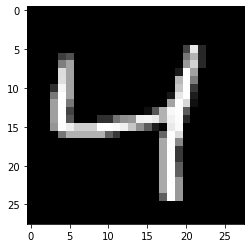

In [18]:
plt.imshow(X_train[2], cmap='gray');

### (1.2) Image Preprocessing

❗️ **Neural Networks converge faster when the input data is somehow normalized** ❗️

👩🏻‍🏫 How do we proceed for Convolutional Neural Networks ?
* The `RBG` intensities are coded between 0 and 255. 
* We can simply divide the input data by the maximal value 255 to have all the pixels' intensities between 0 and 1 😉

❓ **Question ❓ As a first preprocessing step, please normalize your data.** 

Don't forget to do it both on your train data and your test data.

(*Note: you can also center your data, by subtracting 0.5 from all the values, but it is not mandatory*)

In [49]:
X_train = X_train/255
X_test = X_test/255

### (1.3) Inputs' dimensionality

In [50]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


👆 Remember that you have 60,000 training images and 10,000 test images, each of size $(28, 28)$. However...

> ❗️  **`Convolutional Neural Network models need to be fed with images whose last dimension is the number of channels`.**  

> 🧑🏻‍🏫 The shape of tensors fed into ***ConvNets*** is the following: `(NUMBER_OF_IMAGES, HEIGHT, WIDTH, CHANNELS)`

🕵🏻This last dimension is clearly missing here. Can you guess the reason why?
<br>
<details>
    <summary><i>Answer<i></summary>
        
* All these $60000$ $ (28 \times 28) $ pictures are black-and-white $ \implies $ Each pixel lives on a spectrum from full black (0) to full white (1).
        
    * Theoretically, you don't need to know the number of channels for a black-and-white picture since there is only 1 channel (the "whiteness" of "blackness" of a pixel). However, it is still mandatory for the model to have this number of channels explicitly stated.
        
    * In comparison, colored pictures need multiple channels:
        - the RGB system with 3 channels (<b><span style="color:red">Red</span> <span style="color:green">Green</span> <span style="color:blue">Blue</span></b>)
        - the CYMK system  with 4 channels (<b><span style="color:cyan">Cyan</span> <span style="color:magenta">Magenta</span> <span style="color:yellow">Yellow</span> <span style="color:black">Black</span></b>)
        
        
</details>        

❓ **Question: expanding dimensions** ❓

* Use the **`expand_dims`** to add one dimension at the end of the training data and test data.

* Then, print the shapes of `X_train` and `X_test`. They should respectively be equal to $(60000, 28, 28, 1)$ and $(10000, 28, 28, 1)$.

In [33]:
from tensorflow.keras.backend import expand_dims

In [51]:
X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=3)
X_train.shape, X_test.shape

(TensorShape([60000, 28, 28, 1]), TensorShape([10000, 28, 28, 1]))

### (1.4) Target encoding

One more thing to for a multiclass classification task in Deep Leaning:

👉 _"one-hot-encode" the categories*_

❓ **Question: encoding the labels** ❓ 

* Use **`to_categorical`** to transform your labels. 
* Store the results into two variables that you can call **`y_train_cat`** and **`y_test_cat`**.

In [52]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [54]:
y_train_cat.shape

(60000, 10)

In [53]:
# Quick check that you correctly used to_categorical
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

The data is now ready to be used. ✅

## (2) The Convolutional Neural Network

### (2.1) Architecture and compilation of a CNN


❓ **Question: CNN Architecture and compilation** ❓

Now, let's build a <u>Convolutional Neural Network</u> that has: 


- a `Conv2D` layer with 8 filters, each of size $(4, 4)$, an input shape suitable for your task, the `relu` activation function, and `padding='same'`
- a `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$
- a second `Conv2D` layer with 16 filters, each of size $(3, 3)$, and the `relu` activation function
- a second `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$


- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the `relu` activation function
- a last (predictive) layer that is suited for your task

In the function that initializes this model, do not forget to include the <u>compilation of the model</u>, which:
* optimizes the `categorical_crossentropy` loss function,
* with the `adam` optimizer, 
* and the `accuracy` as the metrics

(*Note: you could add more classification metrics if you want but the dataset is well balanced!*)

In [72]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8,(4,4),input_shape=(28,28,1),activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

❓ **Question: number of trainable parameters in a convolutional layer** ❓ 

How many trainable parameters are there in your model?
1. Compute them with ***model.summary( )*** first
2. Recompute them manually to make sure you properly understood ***what influences the number of weights in a CNN***.

In [65]:
model = initialize_model()
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 25, 25, 8)         136       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        1168      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

### (2.2) Training a CNN

❓ **Question: training a CNN** ❓ 

Initialize your model and fit it on the train data. 
- Do not forget to use a **Validation Set/Split** and an **Early Stopping criterion**. 
- Limit yourself to 5 epochs max in this challenge, just to save some precious time for the more advanced challenges!

In [73]:
from re import X
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3,restore_best_weights=True)

model = initialize_model()
model.fit(X_train,
          y_train_cat,
          batch_size=32,
          epochs=5,
          callbacks=[es],
          validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.5112 - accuracy: 0.8362 - val_loss: 0.1925 - val_accuracy: 0.9445
Epoch 2/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.1678 - accuracy: 0.9511 - val_loss: 0.1443 - val_accuracy: 0.9560
Epoch 3/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.1259 - accuracy: 0.9633 - val_loss: 0.1215 - val_accuracy: 0.9614
Epoch 4/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.1043 - accuracy: 0.9692 - val_loss: 0.1067 - val_accuracy: 0.9675
Epoch 5/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0962 - val_accuracy: 0.9704


❓ **Question: How many iterations does the CNN perform per epoch** ❓

_Note: it has nothing to do with the fact that this is a CNN. This is related to the concept of forward/backward propagation already covered during the previous lecture on optimizers, fitting, and losses 😉_

> N/batch_size = 60000/32 = 1875
val_split = 0.3 so 1875*(1-0.3) = 1313

<details>
    <summary><i>Answer</i></summary>

With `verbose = 1` when fitting your model, you have access to crucial information about your training procedure.
    
Remember that we've just trained our CNN model on $60000$ training images

If the chosen batch size is 32: 

* For each epoch, we have $ \large \lceil \frac{60000}{32} \rceil = 1875$ minibatches <br/>
* The _validation_split_ is equal to $0.3$ - which means that within one single epoch, there are:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batches are used to compute the `train_loss` 
    * $ 1875 - 1312 = 562 $ batches are used to compute the `val_loss`
    * **The parameters are updated 1313 times per epoch** as there are 1313 forward/backward propagations per epoch !!!


👉 With so many updates of the weights within one epoch, you can understand why this CNN model converges even with a limited number of epochs.

</details>    


### (2.3) Evaluating its performance

❓ **Question: Evaluating your CNN** ❓ 

What is your **`accuracy on the test set?`**

In [74]:
model.evaluate(X_test,y_test_cat)[1]

313/313 [==============================] - 4s 12ms/step - loss: 0.0838 - accuracy: 0.9744


0.974399983882904

🎉 You should already be impressed by your CNN skills! Reaching over 95% accuracy!

🔥 You solved what was a very hard problem 30 years ago with your own CNN.

🏁 **Congratulations!**

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!